# Problem Statement

# Description

In [ ]:
Variable                       Description

member_id                  -unique ID assigned to each member
loan_amnt                  -loan amount (in dollar) applied by the member
funded_amnt                -loan amount (in dollar) sanctioned by the bank
funded_amnt_inv            -loan amount (in dollar) sanctioned by the investors
term	                   - term of loan (in months)
batch_enrolled             -batch numbers allotted to members
int_rate                   -interest rate (%) on loan
grade	                   - grade assigned by the bank
sub_grade                  -grade assigned by the bank
emp_title                  -job / Employer title of member
emp_length                 -employment length, where 0 means less than one year and 10 means ten or more years
home_ownership             -status of home ownership
annual_inc                 -annual income (in dollar) reported by the member
verification_status        -status of income verified by the bank
pymnt_plan                 -indicates if any payment plan has started against loan
desc                       -loan description provided by member
purpose                    -purpose of loan
title                      -loan title provided by member
zip_code                   -first three digits of area zipcode of member
addr_state                 -living state of member
dti                        -ratio of member's total monthly debt repayment excluding mortgage divided by self reported                                     monthly income                   
delinq_2yrs                -number of 30+ days delinquency in past 2 years
inq_last_6mths             -number of inquiries in last 6 months
mths_since_last_delinq     -number of months since last delinq
mths_since_last_record     -number of months since last public record
open_acc                   -number of open credit line in member's credit line
pub_rec                    -number of derogatory public records
revol_bal                  -total credit revolving balance
revol_util                 -amount of credit a member is using relative to revol_bal
total_acc                  -total number of credit lines available in members credit line
initial_list_status        -unique listing status of the loan - W(Waiting), F(Forwarded)
total_rec_int              -interest received till date
total_rec_late_fee         -Late fee received till date
recoveries                 -post charge off gross recovery
collection_recovery_fee    -post charge off collection fee
collections_12_mths_ex_med -number of collections in last 12 months excluding medical collections
mths_since_last_major_derog-months since most recent 90 day or worse rating
application_type           -indicates when the member is an individual or joint
verification_status_joint  -indicates if the joint members income was verified by the bank
last_week_pay              -indicates how long (in weeks) a member has paid EMI after batch enrolled
acc_now_delinq             -number of accounts on which the member is delinquent
tot_coll_amt               -total collection amount ever owed
tot_cur_bal                -total current balance of all accounts
total_rev_hi_lim           -total revolving credit limit
loan_status                -status of loan amount, 1 = Defaulter, 0 = Non Defaulters


In [83]:
#importing files 
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from statsmodels import robust
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
from scipy import stats

In [84]:
#importing of dataset 
df=pd.read_csv('C:\\Users\\NGS010\\Downloads\\sample_indessa.csv')

In [85]:
#here head() method prints first five records of the dataset
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,36935704,10000,10000,10000.0,36 months,NaN,6.99,A,A3,Marketing Manager,...,0.0,NaN,INDIVIDUAL,NaN,61th week,0.0,0.0,37018.0,23400.0,0
1,1840152,7000,7000,7000.0,36 months,,12.12,B,B3,Lockheed Martin,...,0.0,70.0,INDIVIDUAL,NaN,156th week,0.0,0.0,90215.0,80600.0,1
2,46517526,11575,11575,11575.0,60 months,BAT4136152,17.57,D,D4,warehouse,...,0.0,NaN,INDIVIDUAL,NaN,39th week,0.0,0.0,10670.0,7900.0,0
3,5493577,3500,3500,3500.0,36 months,,18.75,D,D3,Veterans Administration Medical Center,...,0.0,NaN,INDIVIDUAL,NaN,100th week,0.0,0.0,129043.0,22200.0,1
4,2730695,17625,17625,17625.0,36 months,,13.11,B,B4,City National Bank,...,0.0,56.0,INDIVIDUAL,NaN,87th week,0.0,80.0,26619.0,39000.0,1


In [86]:
#so as we are having some of the special charecters in this dataset so to remove those special charecters we use this below method.so that our dataset doesnot have any special charecters. 
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['desc'] = df['desc'].str.replace(char, ' ')
    df['emp_title']=df['emp_title'].str.replace(char,' ')

In [87]:
#so after removing the special charecters we have some white spaces in those columns so to join them we use this below method
df['desc'] = df['desc'].str.split().str.join(" ")
df['emp_title']=df['emp_title'].str.split().str.join(" ")

In [4]:
df.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

In [5]:
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,36935704,10000,10000,10000.0,36 months,NaN,6.99,A,A3,Marketing Manager,...,0.0,NaN,INDIVIDUAL,NaN,61th week,0.0,0.0,37018.0,23400.0,0
1,1840152,7000,7000,7000.0,36 months,,12.12,B,B3,Lockheed Martin,...,0.0,70.0,INDIVIDUAL,NaN,156th week,0.0,0.0,90215.0,80600.0,1
2,46517526,11575,11575,11575.0,60 months,BAT4136152,17.57,D,D4,warehouse,...,0.0,NaN,INDIVIDUAL,NaN,39th week,0.0,0.0,10670.0,7900.0,0
3,5493577,3500,3500,3500.0,36 months,,18.75,D,D3,Veterans Administration Medical Center,...,0.0,NaN,INDIVIDUAL,NaN,100th week,0.0,0.0,129043.0,22200.0,1
4,2730695,17625,17625,17625.0,36 months,,13.11,B,B4,City National Bank,...,0.0,56.0,INDIVIDUAL,NaN,87th week,0.0,80.0,26619.0,39000.0,1


In [6]:
#here we are taking one of the function to perform EDA for the dataset.
def data(df):
#So here we can take all the unique,missing,infinite,zeros,min,max,mean,std,varience,coefficient of deviation,mean absolute deviation,kurtosis,skewness,quartiles,monotocity of all the numeric columns
    numerical_df = pd.DataFrame(columns = ["col",'Distnict','Distnict%','Missing','Missing%','Infinite','Infinite%','Zeros','Zeros%','Maximum','Minimum','STD','Variance','COD','MAD','Skewness','Kurtosis','5th Percentile','Q1','Median','Q3','95th percentile','IQR','Monotonic'])
#So here we can take all the unique,missing,frequency,minstringlength,maxlengthstring of all the categoric columns
    categorical_df=pd.DataFrame(columns=["col",'Distnict','Distnict%','Missing','Missing%','Frequency','MinStringLength','MaxStringLength'])
    for column in df.columns:
        distnct = df[column].nunique()
        dflen = len(df[column])
        distnct_per = round(((df[column].nunique())/dflen) * 100, 2)

        missing = df[column].isnull().sum()
        missing_per =df[column].isnull().sum()*100

        if str(df[column].dtypes) in ['int64', 'float64']:

            infinite=((df[column]== np.inf) | (df[column] == -np.inf)).sum()
            infinite_per=round((infinite/dflen) * 100, 2)



            zeros = (df[column]==0).sum()
            dflen = len(df[column])
            mean = sum(df[column])/dflen
            zeros_per = round(((df[column] == 0).astype(int).sum(axis=0)/dflen)*100,2)
            maxValues = df[column].max()
            minValues = df[column].min()
            standardDevation = df[column].std()
            variance = df[column].var()
            cv = standardDevation/mean if mean else np.NaN
            mad = stats.median_absolute_deviation(df[column])
            skew = df[column].skew(axis = 0, skipna = True)
            kurto = df[column].kurtosis(axis = 0, skipna = True)
            fifth_th_per = df[column].quantile(0.05)
            Q1 = df[column].quantile(0.25)
            median = df[column].median(axis = 0)
            Q3 = df[column].quantile(0.25)
            iqr = Q3-Q1
            NintyFifth_th_per = df[column].quantile(0.95)
            if df[column].is_monotonic:
                monotonic = 'monotonic'
            else:
                monotonic = 'no monotonic'
            numerical_df = numerical_df.append({'col': column ,'Distnict':distnct,'Distnict%':distnct_per,'Missing':missing,'Missing%': missing_per,'Infinite':infinite,'Infinite%':infinite_per,'Zeros':zeros,'Zeros%':zeros_per,'Maximum':maxValues,'Minimum':minValues,'STD':standardDevation,'Variance':variance,'COD':cv,'MAD':mad,'Skewness':skew,'Kurtosis':kurto,'5th Percentile':fifth_th_per,'Q1':Q1,'Median':median,'Q3':Q3,'95th percentile':NintyFifth_th_per,'IQR':iqr,'Monotonic':monotonic},ignore_index=True)
        else:
            freq = df[column].mode()
            length = np.vectorize(len)
            MaxStrLen = df[column].astype(str).map(len).max()
            MinStrLen = df[column].astype(str).map(len).min()
            categorical_df = categorical_df.append({"col":column,'Distnict':distnct,'Distnict%':distnct_per,'Missing':missing,'Missing%':missing_per,'Frequency':freq,'MinStringLength':MaxStrLen,'MaxStringLength':MinStrLen},ignore_index=True)
    numerical_df= numerical_df.set_index('col')
    categorical_df= categorical_df.set_index('col')
    return numerical_df,categorical_df

In [7]:
#So here we can take the numeric and categoric of all the eda into a dataframe
numerical_df,categorical_df=data(df)

In [8]:
#So here we display all the numeric EDA operations in this one code
numerical_df

,Distnict,Distnict%,Missing,Missing%,Infinite,Infinite%,Zeros,Zeros%,Maximum,Minimum,...,MAD,Skewness,Kurtosis,5th Percentile,Q1,Median,Q3,95th percentile,IQR,Monotonic
col,,,,,,,,,,,,,,,,,,,,,
member_id,329127,100.00,0,0,0,0.0,0,0.00,73519894,70473,...,3.215442e+07,0.256034,-1.423970,995314.400,7818479.00,26697658.00,7818479.00,70051406.10,0.0,no monotonic
loan_amnt,1366,0.42,0,0,0,0.0,0,0.00,35000,500,...,8.302560e+03,0.716424,-0.187111,3500.000,8000.00,12400.00,8000.00,31450.00,0.0,no monotonic
funded_amnt,1366,0.42,0,0,0,0.0,0,0.00,35000,500,...,8.339625e+03,0.719468,-0.179530,3500.000,8000.00,12375.00,8000.00,31300.00,0.0,no monotonic
funded_amnt_inv,5854,1.78,0,0,0,0.0,119,0.04,35000.0,0.0,...,8.487885e+03,0.716007,-0.179892,3400.000,8000.00,12225.00,8000.00,31300.00,0.0,no monotonic
int_rate,532,0.16,0,0,0,0.0,0,0.00,28.99,5.32,...,4.447800e+00,0.418220,-0.165965,6.620,9.99,12.99,9.99,20.99,0.0,no monotonic
annual_inc,23625,7.18,3,300,0,0.0,0,0.00,8500021.0,1896.0,...,NaN,41.940111,4214.691601,28000.000,45000.00,65000.00,45000.00,150000.00,0.0,no monotonic
dti,4036,1.23,0,0,0,0.0,207,0.06,380.53,0.0,...,8.762166e+00,0.509215,10.816178,4.960,11.61,17.27,11.61,32.27,0.0,no monotonic
delinq_2yrs,24,0.01,14,1400,0,0.0,268078,81.45,30.0,0.0,...,NaN,5.536018,56.484764,0.000,0.00,0.00,0.00,2.00,0.0,no monotonic
inq_last_6mths,23,0.01,14,1400,0,0.0,180762,54.92,31.0,0.0,...,NaN,2.104401,11.907620,0.000,0.00,0.00,0.00,3.00,0.0,no monotonic


In [9]:
#So here we can display all the categoric EDA operations in one code.
categorical_df

,Distnict,Distnict%,Missing,Missing%,Frequency,MinStringLength,MaxStringLength
col,,,,,,,
term,2,0.00,0,0,0 36 months dtype: object,9,9
batch_enrolled,104,0.03,52552,5255200,0 dtype: object,10,1
grade,7,0.00,0,0,0 B dtype: object,1,1
sub_grade,35,0.01,0,0,0 B3 dtype: object,2,2
emp_title,135082,41.04,18592,1859200,0 Teacher dtype: object,75,1
emp_length,11,0.00,15648,1564800,0 10+ years dtype: object,9,3
home_ownership,6,0.00,0,0,0 MORTGAGE dtype: object,8,3
verification_status,3,0.00,0,0,0 Source Verified dtype: object,15,8
pymnt_plan,2,0.00,0,0,0 n dtype: object,1,1


In [10]:
#so here we can find the correlation of all the columns
df.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
member_id,1.000000,0.085985,0.088813,0.095502,-0.107991,0.037197,0.154720,0.060027,-0.127080,-0.014547,...,-0.067562,-0.085189,-0.052197,0.057527,0.058739,0.021363,0.026932,0.006088,0.048326,-0.554976
loan_amnt,0.085985,1.000000,0.998988,0.996122,0.152255,0.330826,0.049341,-0.000176,-0.031560,-0.035659,...,0.027361,0.072538,0.051606,-0.009626,-0.037404,0.005055,-0.019218,0.323912,0.312994,-0.110860
funded_amnt,0.088813,0.998988,1.000000,0.997385,0.152714,0.330623,0.050473,0.000219,-0.032193,-0.035619,...,0.027073,0.072303,0.051568,-0.009410,-0.037402,0.005199,-0.019218,0.323912,0.312991,-0.113010
funded_amnt_inv,0.095502,0.996122,0.997385,1.000000,0.153039,0.329306,0.053571,0.000853,-0.037231,-0.032378,...,0.023417,0.070910,0.049346,-0.008858,-0.037358,0.005422,-0.019219,0.323926,0.313020,-0.117921
int_rate,-0.107991,0.152255,0.152714,0.153039,1.000000,-0.064945,0.163010,0.063102,0.220565,-0.037343,...,0.052609,0.097279,0.063010,0.016053,-0.016271,0.025812,0.002239,-0.093831,-0.166530,0.003185
annual_inc,0.037197,0.330826,0.330623,0.329306,-0.064945,1.000000,-0.173845,0.048624,0.036754,-0.045790,...,0.009902,0.008095,0.006786,-0.002241,-0.037066,0.015164,-0.000045,0.418773,0.271958,-0.011475
dti,0.154720,0.049341,0.050473,0.053571,0.163010,-0.173845,1.000000,-0.001280,-0.020346,0.003309,...,-0.013166,0.007716,0.006919,0.003027,0.029908,0.009029,-0.017351,-0.014209,0.068345,-0.155696
delinq_2yrs,0.060027,-0.000176,0.000219,0.000853,0.063102,0.048624,-0.001280,1.000000,0.019304,-0.562936,...,0.014404,0.000668,0.000633,0.057564,-0.421483,0.131323,0.001344,0.062957,-0.041188,-0.053179
inq_last_6mths,-0.127080,-0.031560,-0.032193,-0.037231,0.220565,0.036754,-0.020346,0.019304,1.000000,0.011696,...,0.032811,0.037344,0.027857,0.002789,0.017063,-0.005222,0.011424,0.036937,0.008040,0.097919
mths_since_last_delinq,-0.014547,-0.035659,-0.035619,-0.032378,-0.037343,-0.045790,0.003309,-0.562936,0.011696,1.000000,...,-0.020689,-0.002035,-0.002918,-0.033557,0.701423,-0.137821,0.032185,-0.094175,-0.025919,0.033956


# Data Visualization

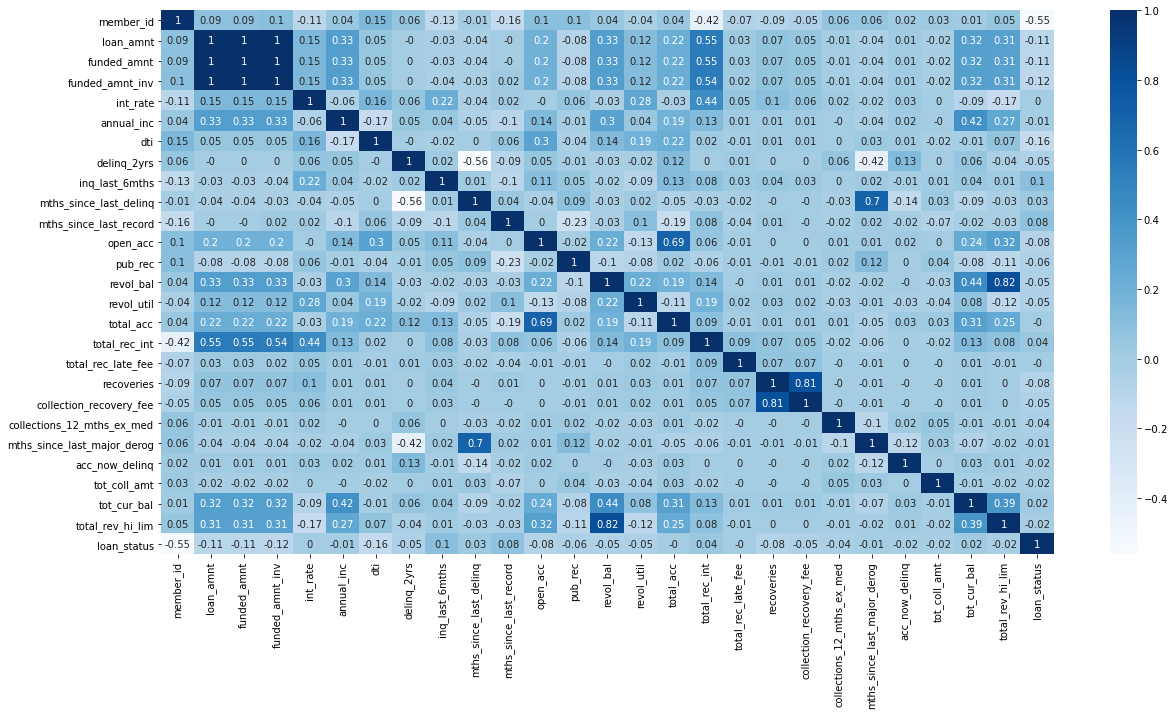

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(round(df.corr(),2),annot=True,cmap='Blues')
plt.show()

(array([19252., 52670., 63032., 46100., 43160., 40908., 18277., 19487.,
         9940., 16301.]),
 array([  500.,  3950.,  7400., 10850., 14300., 17750., 21200., 24650.,
        28100., 31550., 35000.]),
 <BarContainer object of 10 artists>)

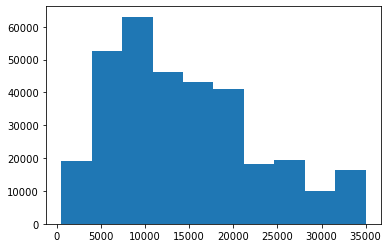

In [11]:
plt.hist(data = df, x = 'loan_amnt')

In [12]:
df.drop(df.columns[[0, 9, 31,42]], axis = 1, inplace = True)

In [13]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_length,home_ownership,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,total_rev_hi_lim,loan_status
0,10000,10000,10000.0,36 months,NaN,6.99,A,A3,< 1 year,RENT,...,0.0,0.0,NaN,INDIVIDUAL,NaN,61th week,0.0,0.0,23400.0,0
1,7000,7000,7000.0,36 months,,12.12,B,B3,10+ years,RENT,...,0.0,0.0,70.0,INDIVIDUAL,NaN,156th week,0.0,0.0,80600.0,1
2,11575,11575,11575.0,60 months,BAT4136152,17.57,D,D4,10+ years,RENT,...,0.0,0.0,NaN,INDIVIDUAL,NaN,39th week,0.0,0.0,7900.0,0
3,3500,3500,3500.0,36 months,,18.75,D,D3,10+ years,MORTGAGE,...,0.0,0.0,NaN,INDIVIDUAL,NaN,100th week,0.0,0.0,22200.0,1
4,17625,17625,17625.0,36 months,,13.11,B,B4,10+ years,RENT,...,0.0,0.0,56.0,INDIVIDUAL,NaN,87th week,0.0,80.0,39000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329122,28100,28100,28100.0,36 months,NaN,14.99,C,C5,3 years,MORTGAGE,...,0.0,0.0,NaN,INDIVIDUAL,NaN,18th week,0.0,0.0,18700.0,1
329123,35000,23050,22775.0,60 months,BAT5877328,13.49,C,C2,10+ years,MORTGAGE,...,0.0,0.0,NaN,INDIVIDUAL,NaN,4th week,0.0,NaN,NaN,1
329124,10275,10275,10275.0,36 months,BAT5547201,13.11,B,B4,10+ years,MORTGAGE,...,0.0,0.0,NaN,INDIVIDUAL,NaN,156th week,0.0,0.0,23300.0,1
329125,35000,35000,35000.0,60 months,BAT5629144,16.99,D,D1,7 years,MORTGAGE,...,0.0,0.0,NaN,INDIVIDUAL,NaN,109th week,0.0,0.0,54400.0,0


In [14]:
df.isnull().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  52552
int_rate                            0
grade                               0
sub_grade                           0
emp_length                      15648
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           268993
purpose                             0
title                              39
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        14
inq_last_6mths                     14
mths_since_last_delinq         171341
mths_since_last_record         280175
open_acc                           14
pub_rec                            14
revol_bal                           0
revol_util  

In [15]:
df.drop(df.columns[[13, 21, 22,33,35]], axis = 1, inplace = True)

In [16]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_length,home_ownership,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,total_rev_hi_lim,loan_status
0,10000,10000,10000.0,36 months,NaN,6.99,A,A3,< 1 year,RENT,...,0.0,0.0,0.0,0.0,INDIVIDUAL,61th week,0.0,0.0,23400.0,0
1,7000,7000,7000.0,36 months,,12.12,B,B3,10+ years,RENT,...,0.0,0.0,0.0,0.0,INDIVIDUAL,156th week,0.0,0.0,80600.0,1
2,11575,11575,11575.0,60 months,BAT4136152,17.57,D,D4,10+ years,RENT,...,0.0,0.0,0.0,0.0,INDIVIDUAL,39th week,0.0,0.0,7900.0,0
3,3500,3500,3500.0,36 months,,18.75,D,D3,10+ years,MORTGAGE,...,0.0,0.0,0.0,0.0,INDIVIDUAL,100th week,0.0,0.0,22200.0,1
4,17625,17625,17625.0,36 months,,13.11,B,B4,10+ years,RENT,...,0.0,0.0,0.0,0.0,INDIVIDUAL,87th week,0.0,80.0,39000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329122,28100,28100,28100.0,36 months,NaN,14.99,C,C5,3 years,MORTGAGE,...,0.0,0.0,0.0,0.0,INDIVIDUAL,18th week,0.0,0.0,18700.0,1
329123,35000,23050,22775.0,60 months,BAT5877328,13.49,C,C2,10+ years,MORTGAGE,...,0.0,0.0,0.0,0.0,INDIVIDUAL,4th week,0.0,NaN,NaN,1
329124,10275,10275,10275.0,36 months,BAT5547201,13.11,B,B4,10+ years,MORTGAGE,...,0.0,0.0,0.0,0.0,INDIVIDUAL,156th week,0.0,0.0,23300.0,1
329125,35000,35000,35000.0,60 months,BAT5629144,16.99,D,D1,7 years,MORTGAGE,...,0.0,0.0,0.0,0.0,INDIVIDUAL,109th week,0.0,0.0,54400.0,0


In [17]:
df.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
batch_enrolled                52552
int_rate                          0
grade                             0
sub_grade                         0
emp_length                    15648
home_ownership                    0
annual_inc                        3
verification_status               0
pymnt_plan                        0
purpose                           0
title                            39
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                      14
inq_last_6mths                   14
open_acc                         14
pub_rec                          14
revol_bal                         0
revol_util                      198
total_acc                        14
initial_list_status               0
total_rec_late_fee                0
recoveries                  

In [18]:
cols = ["batch_enrolled", "emp_length","title"]
df[cols]=df[cols].fillna(df.mode().iloc[0])

In [19]:
df.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
batch_enrolled                    0
int_rate                          0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        3
verification_status               0
pymnt_plan                        0
purpose                           0
title                             0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                      14
inq_last_6mths                   14
open_acc                         14
pub_rec                          14
revol_bal                         0
revol_util                      198
total_acc                        14
initial_list_status               0
total_rec_late_fee                0
recoveries                  

In [20]:
cols = ["annual_inc", "delinq_2yrs","inq_last_6mths","open_acc","pub_rec","revol_util","total_acc","collections_12_mths_ex_med","acc_now_delinq","tot_coll_amt","total_rev_hi_lim"]
df[cols]=df[cols].fillna(df.mean().iloc[0])

In [21]:
(df == 0).sum()

loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                  119
term                               0
batch_enrolled                     0
int_rate                           0
grade                              0
sub_grade                          0
emp_length                         0
home_ownership                     0
annual_inc                         0
verification_status                0
pymnt_plan                         0
purpose                            0
title                              0
zip_code                           0
addr_state                         0
dti                              207
delinq_2yrs                   268078
inq_last_6mths                180762
open_acc                           3
pub_rec                       280819
revol_bal                       1464
revol_util                      1533
total_acc                          0
initial_list_status                0
total_rec_late_fee            324541
r

In [22]:
df.drop(df.columns[[18,19, 21, 26,27,28,29,32,33]], axis = 1, inplace = True)

In [23]:
df.shape

(329127, 27)

In [24]:
(df == 0).sum()

loan_amnt                   0
funded_amnt                 0
funded_amnt_inv           119
term                        0
batch_enrolled              0
int_rate                    0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
pymnt_plan                  0
purpose                     0
title                       0
zip_code                    0
addr_state                  0
dti                       207
open_acc                    3
revol_bal                1464
revol_util               1533
total_acc                   0
initial_list_status         0
application_type            0
last_week_pay               0
total_rev_hi_lim          101
loan_status            203300
dtype: int64

In [25]:
num=df.select_dtypes(include=[np.number])
cat=df.select_dtypes(exclude=[np.number])
num

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,total_rev_hi_lim,loan_status
0,10000,10000,10000.0,6.99,97000.0,15.69,10.0,9170.0,39.2,19.0,23400.000000,0
1,7000,7000,7000.0,12.12,215000.0,12.26,6.0,74140.0,81.3,23.0,80600.000000,1
2,11575,11575,11575.0,17.57,50000.0,12.19,7.0,7345.0,93.0,8.0,7900.000000,0
3,3500,3500,3500.0,18.75,64380.0,10.66,5.0,20820.0,93.8,17.0,22200.000000,1
4,17625,17625,17625.0,13.11,40000.0,25.26,18.0,24403.0,62.6,32.0,39000.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
329122,28100,28100,28100.0,14.99,67000.0,10.48,6.0,16652.0,89.0,28.0,18700.000000,1
329123,35000,23050,22775.0,13.49,73000.0,27.04,13.0,35768.0,37.6,36.0,14487.962777,1
329124,10275,10275,10275.0,13.11,30840.0,14.98,10.0,15831.0,67.9,26.0,23300.000000,1
329125,35000,35000,35000.0,16.99,157685.0,17.09,10.0,39177.0,72.0,32.0,54400.000000,0


In [26]:
cat

,term,batch_enrolled,grade,sub_grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,initial_list_status,application_type,last_week_pay
0,36 months,,A,A3,< 1 year,RENT,Not Verified,n,debt_consolidation,Debt consolidation,928xx,CA,w,INDIVIDUAL,61th week
1,36 months,,B,B3,10+ years,RENT,Verified,n,debt_consolidation,Debt Consolidation,950xx,CA,f,INDIVIDUAL,156th week
2,60 months,BAT4136152,D,D4,10+ years,RENT,Source Verified,n,debt_consolidation,Debt consolidation,553xx,MN,f,INDIVIDUAL,39th week
3,36 months,,D,D3,10+ years,MORTGAGE,Source Verified,n,other,Other,820xx,WY,f,INDIVIDUAL,100th week
4,36 months,,B,B4,10+ years,RENT,Not Verified,n,debt_consolidation,Payoff my debt,905xx,CA,w,INDIVIDUAL,87th week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329122,36 months,,C,C5,3 years,MORTGAGE,Source Verified,n,credit_card,Credit card refinancing,871xx,NM,w,INDIVIDUAL,18th week
329123,60 months,BAT5877328,C,C2,10+ years,MORTGAGE,Verified,n,credit_card,DNA,958xx,CA,f,INDIVIDUAL,4th week
329124,36 months,BAT5547201,B,B4,10+ years,MORTGAGE,Not Verified,n,credit_card,freedom,286xx,NC,w,INDIVIDUAL,156th week
329125,60 months,BAT5629144,D,D1,7 years,MORTGAGE,Source Verified,n,credit_card,Credit card refinancing,703xx,LA,w,INDIVIDUAL,109th week


In [27]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
cat['term']    = label.fit_transform(cat['term'])
cat['batch_enrolled'] = label.fit_transform(cat['batch_enrolled'])
cat['grade'] = label.fit_transform(cat['grade'])
cat['sub_grade']    = label.fit_transform(cat['sub_grade'])
cat['emp_length'] = label.fit_transform(cat['emp_length'])
cat['home_ownership'] = label.fit_transform(cat['home_ownership'])
cat['verification_status']    = label.fit_transform(cat['verification_status'])
cat['pymnt_plan'] = label.fit_transform(cat['pymnt_plan'])
cat['purpose'] = label.fit_transform(cat['purpose'])
cat['title']    = label.fit_transform(cat['title'])
cat['zip_code'] = label.fit_transform(cat['zip_code'])
cat['addr_state'] = label.fit_transform(cat['addr_state'])
cat['initial_list_status']    = label.fit_transform(cat['initial_list_status'])
cat['application_type'] = label.fit_transform(cat['application_type'])
cat['last_week_pay'] = label.fit_transform(cat['last_week_pay'])

In [28]:
cat.head()

,term,batch_enrolled,grade,sub_grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,initial_list_status,application_type,last_week_pay
0,0,0,0,2,10,5,0,0,2,8733,834,4,1,0,81
1,0,0,1,7,1,5,2,0,2,7787,854,4,0,0,21
2,1,64,3,18,1,5,1,0,2,8733,506,23,0,0,73
3,0,0,3,17,1,1,1,0,9,18904,748,50,0,0,1
4,0,0,1,8,1,5,0,0,2,20661,811,4,1,0,90


In [29]:
cat.isnull().sum()

term                   0
batch_enrolled         0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
verification_status    0
pymnt_plan             0
purpose                0
title                  0
zip_code               0
addr_state             0
initial_list_status    0
application_type       0
last_week_pay          0
dtype: int64

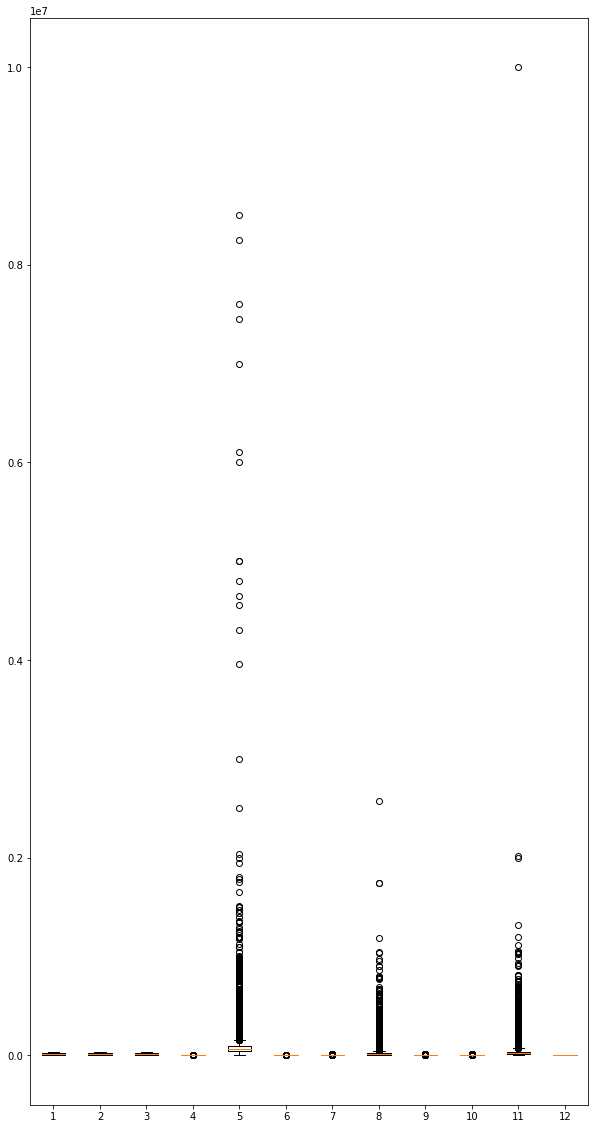

In [30]:
fig = plt.figure(figsize =(10, 20))
plt.boxplot(num)
plt.show()

In [31]:
num.shape

(329127, 12)

In [32]:
for columns in num.columns:
    Q1 = num[columns].quantile(0.25)
    Q3 = num[columns].quantile(0.75)
    IQR = Q3 - Q1
    print(columns, int(IQR))
    num[columns] = np.where(num[columns] >= (Q3 + 1.5 * IQR),num[columns].mean(),num[columns])
    num[columns] = np.where(num[columns] <= (Q1 - 1.5 * IQR),num[columns].mean(),num[columns])

loan_amnt 12000
funded_amnt 12000
funded_amnt_inv 12000
int_rate 6
annual_inc 45000
dti 11
open_acc 6
revol_bal 14237
revol_util 36
total_acc 15
total_rev_hi_lim 22212
loan_status 1


In [33]:
num.shape

(329127, 12)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d984f95fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d984fa36d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d984f95c70>,
 'medians': [<matplotlib.lines.Line2D at 0x1d984fa3d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d984fb0160>,
 'means': []}

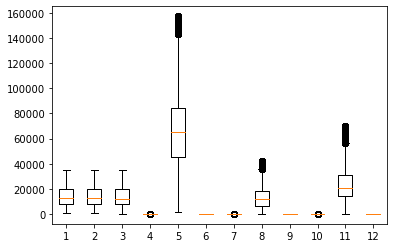

In [34]:
plt.boxplot(num)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(num)
st =scaler.transform(num)
print(st)

[[-0.53524844 -0.5335019  -0.52619551 ... -0.52497775 -0.07210568
  -0.78671645]
 [-0.8930378  -0.89160967 -0.88355878 ... -0.14515477  0.37128796
   1.271106  ]
 [-0.34740903 -0.34549532 -0.3385798  ... -1.56949095 -1.13368952
  -0.78671645]
 ...
 [-0.50245109 -0.50067536 -0.49343721 ...  0.13971247 -0.07895461
   1.271106  ]
 [ 2.44632956  2.4507295   2.45183173 ...  0.70944694  2.05106199
  -0.78671645]
 [-1.25082717 -1.24971744 -1.24092205 ... -1.56949095 -1.31176164
  -0.78671645]]


In [36]:
sd=pd.DataFrame(data = st,columns =  ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'annual_inc',
       'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'total_rev_hi_lim', 'loan_status'])

In [37]:
sd.isnull().sum()

loan_amnt           0
funded_amnt         0
funded_amnt_inv     0
int_rate            0
annual_inc          0
dti                 0
open_acc            0
revol_bal           0
revol_util          0
total_acc           0
total_rev_hi_lim    0
loan_status         0
dtype: int64

In [38]:
sd = sd.reset_index()
sd.head()

,index,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,total_rev_hi_lim,loan_status
0,0,-0.535248,-0.533502,-0.526196,-1.461944,0.999234,-0.250672,-0.212289,-0.469071,-0.644930,-0.524978,-0.072106,-0.786716
1,1,-0.893038,-0.891610,-0.883559,-0.246626,0.244699,-0.667452,-1.158554,0.344537,1.108357,-0.145155,0.371288,1.271106
2,2,-0.347409,-0.345495,-0.338580,1.044502,-0.609912,-0.675957,-0.921988,-0.668085,1.595613,-1.569491,-1.133690,-0.786716
3,3,-1.310459,-1.309402,-1.300483,1.324049,-0.117582,-0.861868,-1.395120,0.801347,1.628929,-0.714889,-0.154293,1.271106
4,4,0.374133,0.376689,0.382103,-0.012091,-0.952284,0.912179,1.680240,1.192069,0.329581,0.709447,0.996327,1.271106


In [55]:
cat = cat.reset_index()
cat.head()

,level_0,index,term,batch_enrolled,grade,sub_grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,initial_list_status,application_type,last_week_pay
0,0,0,0,0,0,2,10,5,0,0,2,8733,834,4,1,0,81
1,1,1,0,0,1,7,1,5,2,0,2,7787,854,4,0,0,21
2,2,2,1,64,3,18,1,5,1,0,2,8733,506,23,0,0,73
3,3,3,0,0,3,17,1,1,1,0,9,18904,748,50,0,0,1
4,4,4,0,0,1,8,1,5,0,0,2,20661,811,4,1,0,90


In [40]:
x = pd.merge(cat, sd, left_index=True, right_index=True)
x

,index_x,term,batch_enrolled,grade,sub_grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,...,funded_amnt_inv,int_rate,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,total_rev_hi_lim,loan_status
0,0,0,0,0,2,10,5,0,0,2,...,-0.526196,-1.461944,0.999234,-0.250672,-0.212289,-0.469071,-0.644930,-0.524978,-0.072106,-0.786716
1,1,0,0,1,7,1,5,2,0,2,...,-0.883559,-0.246626,0.244699,-0.667452,-1.158554,0.344537,1.108357,-0.145155,0.371288,1.271106
2,2,1,64,3,18,1,5,1,0,2,...,-0.338580,1.044502,-0.609912,-0.675957,-0.921988,-0.668085,1.595613,-1.569491,-1.133690,-0.786716
3,3,0,0,3,17,1,1,1,0,9,...,-1.300483,1.324049,-0.117582,-0.861868,-1.395120,0.801347,1.628929,-0.714889,-0.154293,1.271106
4,4,0,0,1,8,1,5,0,0,2,...,0.382103,-0.012091,-0.952284,0.912179,1.680240,1.192069,0.329581,0.709447,0.996327,1.271106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329122,329122,0,0,2,14,3,1,1,0,1,...,1.629896,0.433289,-0.027881,-0.883740,-1.158554,0.346832,1.429029,0.329624,-0.394005,1.271106
329123,329123,1,102,2,11,1,1,2,0,1,...,0.995576,0.077933,0.177542,1.128467,0.497409,2.431408,-0.711563,1.089270,-0.682485,1.271106
329124,329124,0,93,1,8,1,1,0,0,1,...,-0.493437,-0.012091,-1.265896,-0.336944,-0.212289,0.257303,0.550304,0.139712,-0.078955,1.271106
329125,329125,1,96,3,15,7,1,1,0,1,...,2.451832,0.907097,0.244699,-0.080558,-0.212289,2.803155,0.721051,0.709447,2.051062,-0.786716


In [41]:
x.shape

(329127, 29)

In [42]:
label=df['loan_status']

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,label,test_size=0.4,random_state=42)

In [44]:
from sklearn import linear_model

In [46]:
lr = linear_model.LinearRegression()

In [88]:
lr.fit(X_train,y_train)

LinearRegression()

In [75]:
lr.coef_

array([-8.66317999e-08])

In [76]:
lr.intercept_

0.38879936291021455

In [89]:
lr.predict(X_test)

array([ 5.96134253e-13,  1.00000000e+00, -1.09634524e-13, ...,
       -7.40574269e-13,  2.52298182e-13,  1.00000000e+00])

In [90]:
import pickle

In [91]:
with open('model_pkl', 'wb') as files:
    pickle.dump(lr, files)

In [92]:
with open('model_pkl' , 'rb') as f:
    model = pickle.load(f)

In [93]:
lr.predict(X_test)

array([ 5.96134253e-13,  1.00000000e+00, -1.09634524e-13, ...,
       -7.40574269e-13,  2.52298182e-13,  1.00000000e+00])